In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path)

OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]
OPS_bins = OPS_APS['Exp1'].keys()[1:17].to_list()

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_bins, OPS_mid_point, 7.86)
    OPS_mass_conc[key] = mass_conc

APS_dict_keys = ['20241016_APS', '20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[2:53].to_list()
APS_bin_mean = []
for key in OPS_APS['20241016_APS'].keys()[2:53]:
    APS_bin_mean.append(float(key))
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce') * 7.86

APS_mass_conc = {}
APS_mass_conc['20241016_APS'] = OPS_APS['20241016_APS']
for key in APS_dict_keys[1:]:
    mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_bin_mean, 7.86)
    APS_mass_conc[key] = mass_conc

APS_number = pd.DataFrame({'Time': OPS_APS['20241016_APS']['Time']})
for i, key in enumerate(APS_bins):
    # Ensure df[key] is numeric
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce')
    
    APS_number[key] = OPS_APS['20241016_APS'][key] / ((7.86 / 10**6) * (np.pi / 6) * APS_bin_mean[i]**3 * 10**6) # in #/cm**3
OPS_APS['20241016_APS'] = APS_number

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


In [3]:
timestamps_BG_before = [['2024-10-16 10:16:00', '2024-10-16 10:26:00'],
                        ['2024-10-16 14:43:00', '2024-10-16 14:54:00'],
                        ['2024-10-17 09:48:00', '2024-10-17 10:00:00'],
                        ['2024-10-17 13:16:00', '2024-10-17 13:26:00']]

timestamps_increase = [['2024-10-16 10:26:00', '2024-10-16 10:45:00'],
                       ['2024-10-16 14:54:00', '2024-10-16 15:00:00'],
                       ['2024-10-17 10:00:00', '2024-10-17 10:20:00'],
                       ['2024-10-17 14:19:00', '2024-10-17 14:30:00']]

timestamps_exp = [['2024-10-16 10:45:00', '2024-10-16 12:26:00'],
                  ['2024-10-16 15:00:00', '2024-10-16 15:34:00'],
                  ['2024-10-17 10:20:00', '2024-10-17 12:01:00'],
                  ['2024-10-17 14:30:00', '2024-10-17 15:01:00']]

ax_labels = ['Particle diameter / $\mu$m', 'Number concentration / #/cm$^{3}$', 'Mass concentration / $\mu$g/m$^{3}$']

In [4]:
OPS_running_number = {}
OPS_running_mass = {}
for i, key in enumerate(OPS_dict_keys):
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], OPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = OPS_bins
    exp_number = running_mean(OPS_APS[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_number[key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], OPS_mass_conc[key], OPS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = OPS_bins
    exp_mass = running_mean(OPS_mass_conc[key], None, OPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    OPS_running_mass[key] = pd.concat([bg_mass, exp_mass]).T

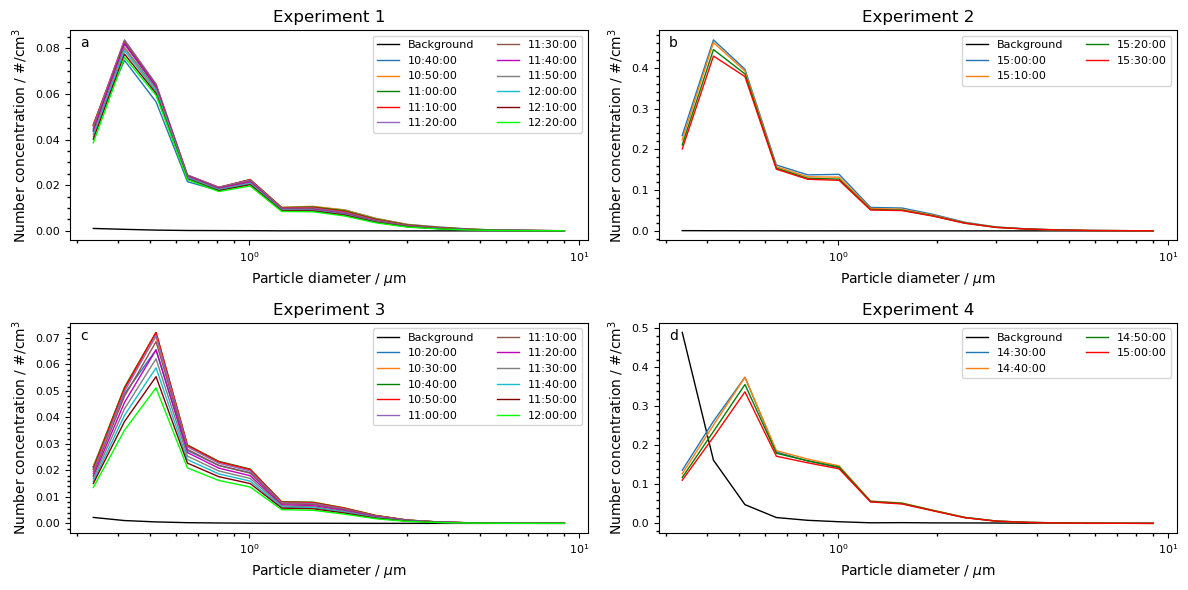

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, OPS_running_number[key], OPS_mid_point, 2, ax_labels[:2], 1)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/OPS_running_number.png', dpi = 600)

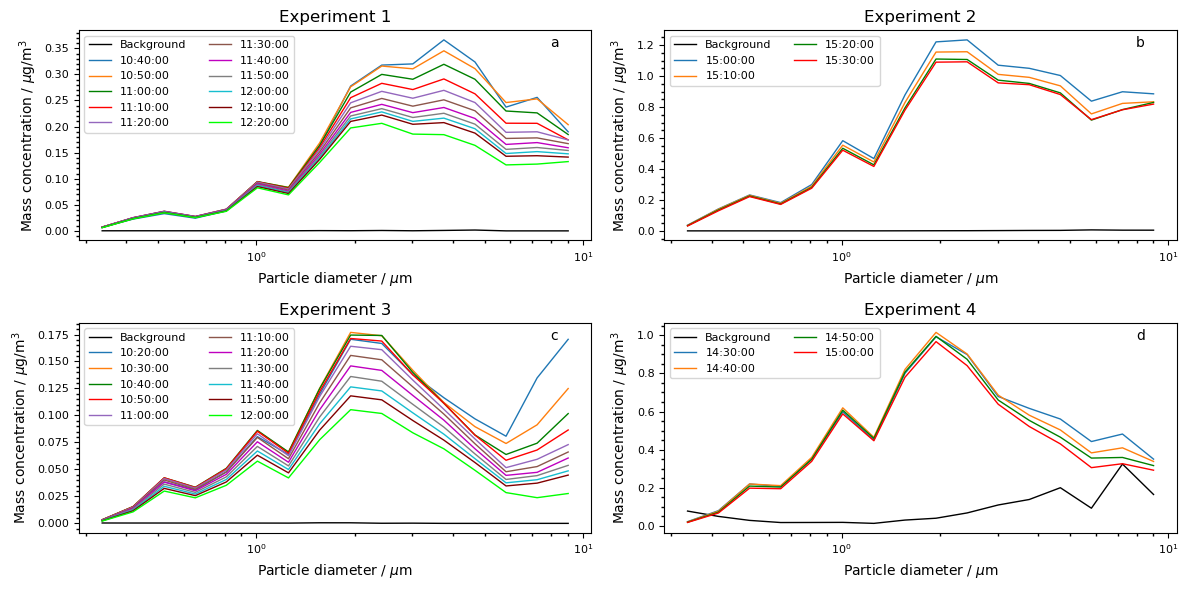

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, OPS_running_mass[key], OPS_mid_point, 2, [ax_labels[0], ax_labels[2]], 2)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/OPS_running_mass.png', dpi = 600)

In [7]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key))
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()

NanoScan_running = {}
for i, key in enumerate(NanoScan_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], NanoScan_Bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = NanoScan_Bins
    exp_number = running_mean(SMPS[key], None, NanoScan_Bins, 'Time', '10T', 10, timestamps_exp[i])
    NanoScan_running[new_key] = pd.concat([bg_number, exp_number]).T

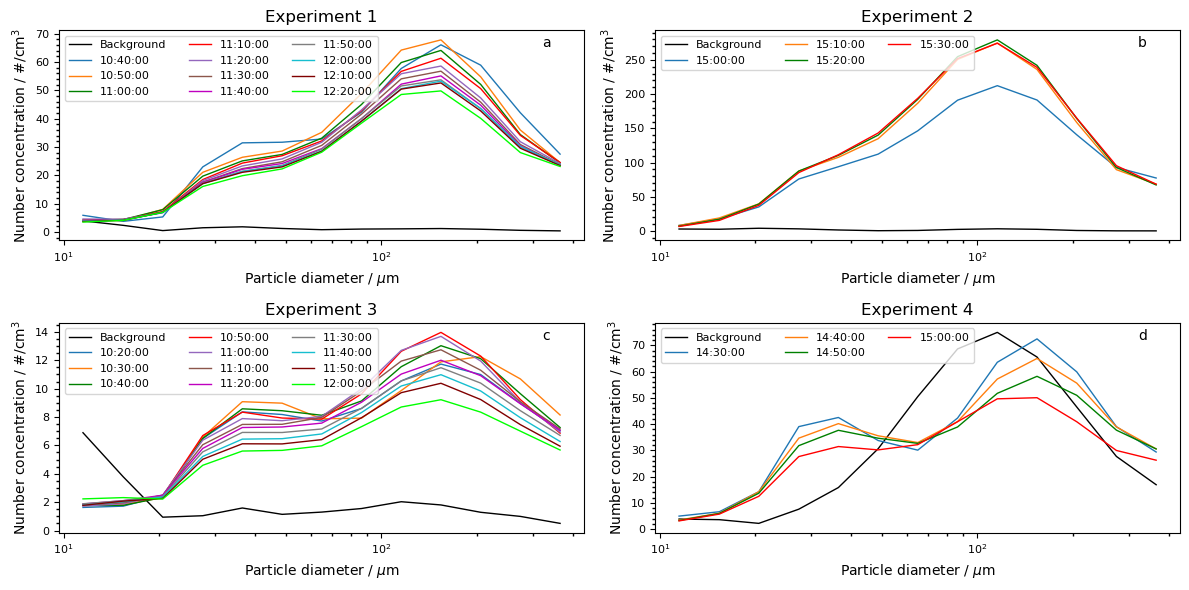

In [8]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, NanoScan_running[key], NanoScan_bin_mean, 3, ax_labels[:2], 2)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/NanoScan_running.png', dpi = 600)

In [9]:
APS_running_number = {}
APS_running_mass = {}
for i, key in enumerate(APS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], OPS_APS[key], APS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = APS_bins
    exp_number = running_mean(OPS_APS[key], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_number[new_key] = pd.concat([bg_number, exp_number]).T
    mean_mass, std, errors = bin_mean(timestamps_BG_before[i], APS_mass_conc[key], APS_bins, 'Time', None)
    bg_mass = pd.DataFrame({'Background': mean_mass}).T
    bg_mass.columns = APS_bins
    exp_mass = running_mean(APS_mass_conc[key], None, APS_bins, 'Time', '10T', 10, timestamps_exp[i])
    APS_running_mass[new_key] = pd.concat([bg_mass, exp_mass]).T

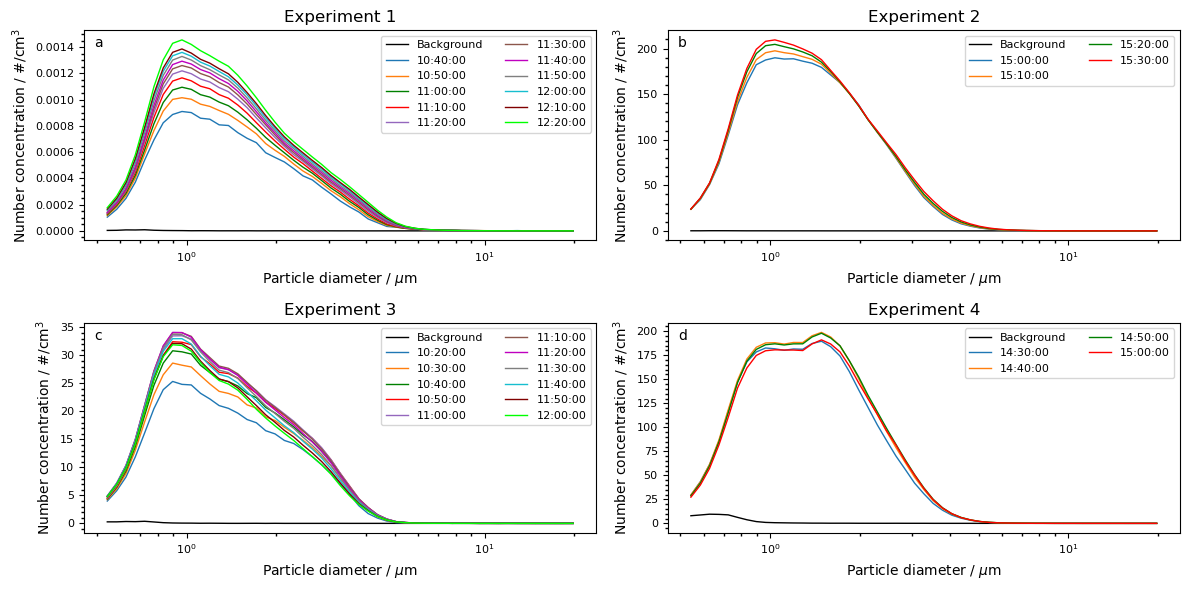

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, APS_running_number[key], APS_bin_mean, 2, ax_labels[:2], 1)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/APS_running_number.png', dpi = 600)

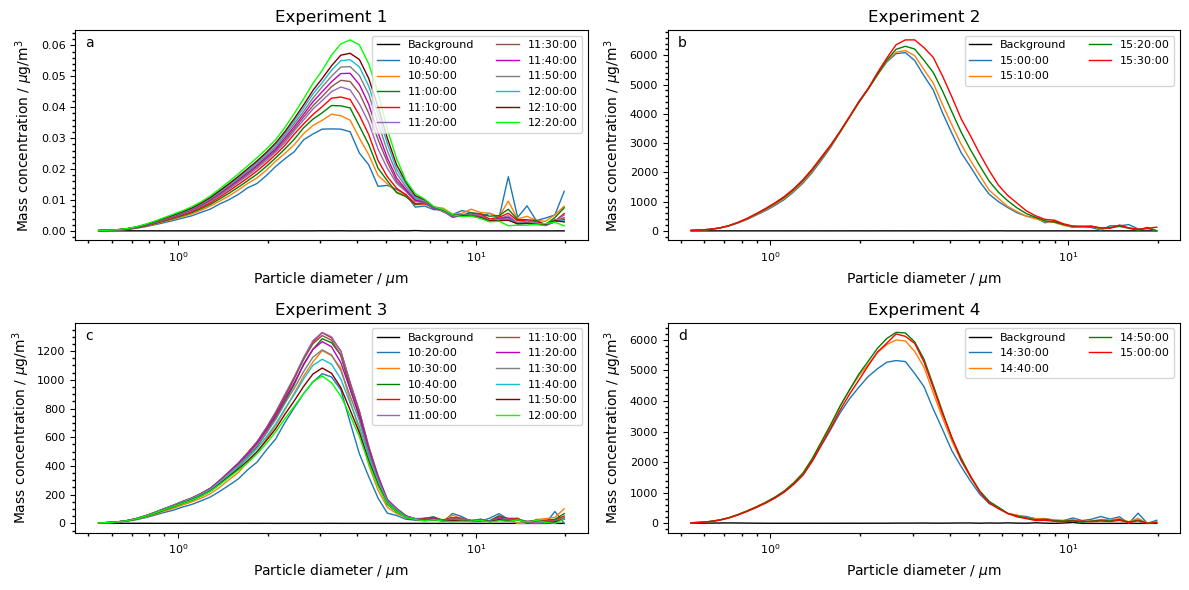

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, APS_running_mass[key], APS_bin_mean, 2, [ax_labels[0], ax_labels[2]], 1)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/APS_running_mass.png', dpi = 600)

In [12]:
SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[83:196].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[83:196]:
    SMPS_bin_mean.append(float(key))

SMPS_running = {}
for i, key in enumerate(SMPS_dict_keys):
    exp_number = str(i + 1)
    new_key = 'Exp' + exp_number
    mean_number, std, errors = bin_mean(timestamps_BG_before[i], SMPS[key], SMPS_bins, 'Time', None)
    bg_number = pd.DataFrame({'Background': mean_number}).T
    bg_number.columns = SMPS_bins
    exp_number = running_mean(SMPS[key], None, SMPS_bins, 'Time', '10T', 10, timestamps_exp[i])
    SMPS_running[new_key] = pd.concat([bg_number, exp_number]).T

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\calculations.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\calculations.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\calculations.py:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

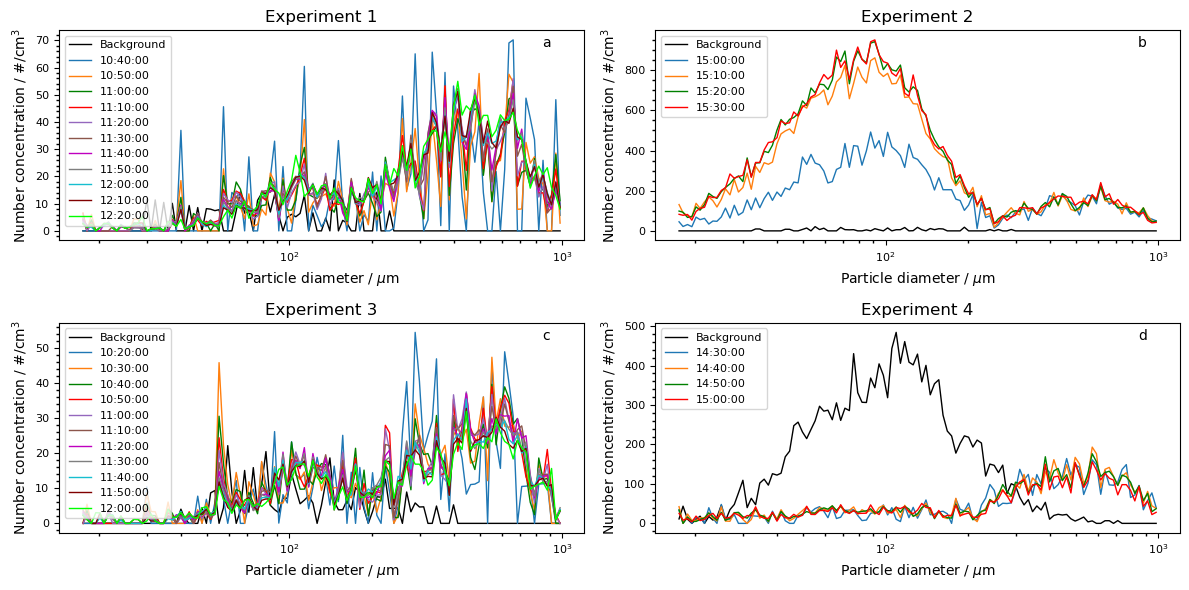

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i, key in enumerate(OPS_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_running_mean(ax, SMPS_running[key], SMPS_bin_mean, 1, ax_labels[:2], 2)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.92, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Running_mean/SMPS_running.png', dpi = 600)

In [14]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
sizes = ['1 um', '2.5 um', '4 um', '10 um']
OPS_cut_point = [7, 11, 13, 17]

OPS_binned_number, OPS_binned_mass = binned_mean(timestamps, OPS_APS, OPS_mass_conc, OPS_dict_keys, sizes, [1, 1], OPS_cut_point, 'Time', True)

for key in OPS_dict_keys:
    OPS_binned_number[key]['2.5/10'] = OPS_binned_number[key]['2.5 um'] / OPS_binned_number[key]['10 um']
    OPS_binned_number[key]['1/10'] = OPS_binned_number[key]['1 um'] / OPS_binned_number[key]['10 um']
    print(key, ' number')
    display(OPS_binned_number[key])
    OPS_binned_mass[key]['2.5/10'] = OPS_binned_mass[key]['2.5 um'] / OPS_binned_mass[key]['10 um']
    OPS_binned_mass[key]['1/10'] = OPS_binned_mass[key]['1 um'] / OPS_binned_mass[key]['10 um']
    print(key, ' mass')
    display(OPS_binned_mass[key])

Exp1  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.002452,0.002527,0.002532,0.002536,0.996255,0.966970
Increase,0.087472,0.099303,0.101002,0.101732,0.976129,0.859826
2024-10-16 10:40:00,0.235704,0.270789,0.275315,0.276607,0.978968,0.852127
2024-10-16 10:50:00,0.251432,0.287029,0.291375,0.292650,0.980794,0.859155
2024-10-16 11:00:00,0.257149,0.291763,0.295812,0.296995,0.982383,0.865837
2024-10-16 11:10:00,0.259535,0.293050,0.296795,0.297866,0.983832,0.871315
2024-10-16 11:20:00,0.259274,0.291803,0.295299,0.296298,0.984827,0.875045
2024-10-16 11:30:00,0.256356,0.287792,0.291070,0.292007,0.985565,0.877912
2024-10-16 11:40:00,0.252276,0.282706,0.285806,0.286686,0.986118,0.879975
2024-10-16 11:50:00,0.247539,0.277141,0.280108,0.280942,0.986471,0.881104


Exp1  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.001403,0.003102,0.004151,0.005751,0.539390,0.243952
Increase,0.075041,0.363493,0.621950,1.280024,0.283973,0.058625
2024-10-16 10:40:00,0.214539,1.055097,1.741471,2.748495,0.383882,0.078057
2024-10-16 10:50:00,0.227999,1.072454,1.728476,2.742326,0.391075,0.083141
2024-10-16 11:00:00,0.232116,1.045133,1.655264,2.586754,0.404032,0.089733
2024-10-16 11:10:00,0.233303,1.012765,1.575045,2.424988,0.417637,0.096208
2024-10-16 11:20:00,0.232637,0.981862,1.505675,2.304969,0.425976,0.100929
2024-10-16 11:30:00,0.229531,0.948847,1.439245,2.192263,0.432816,0.104700
2024-10-16 11:40:00,0.225865,0.918749,1.382010,2.091964,0.439180,0.107968
2024-10-16 11:50:00,0.221741,0.893925,1.336840,2.011748,0.444352,0.110223


Exp2  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.001554,0.001670,0.001701,0.001721,0.970616,0.903328
Increase,0.392099,0.437014,0.441187,0.442605,0.987366,0.885888
2024-10-16 15:00:00,1.536658,1.711745,1.726076,1.730371,0.989236,0.888051
2024-10-16 15:10:00,1.499340,1.665089,1.678625,1.682594,0.989596,0.891088
2024-10-16 15:20:00,1.450448,1.609375,1.622399,1.626184,0.989664,0.891934
2024-10-16 15:30:00,1.410258,1.566042,1.578872,1.582630,0.989519,0.891085


Exp2  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.001041,0.003969,0.008751,0.027697,0.143287,0.037567
Increase,0.371649,1.363042,1.991478,3.190063,0.427277,0.116502
2024-10-16 15:00:00,1.475345,5.275860,7.396504,11.022469,0.478646,0.133849
2024-10-16 15:10:00,1.425197,5.012344,7.015314,10.365513,0.483560,0.137494
2024-10-16 15:20:00,1.381582,4.820510,6.746833,9.967372,0.483629,0.138610
2024-10-16 15:30:00,1.351138,4.729788,6.630279,9.831102,0.481105,0.137435


Exp3  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.004331,0.004416,0.004417,0.004417,0.999590,0.980423
Increase,0.063462,0.070054,0.070699,0.071170,0.984317,0.891699
2024-10-17 10:20:00,0.204362,0.228348,0.230106,0.230579,0.990323,0.886300
2024-10-17 10:30:00,0.215489,0.240427,0.242202,0.242607,0.991018,0.888225
2024-10-17 10:40:00,0.218025,0.242879,0.244632,0.244987,0.991394,0.889946
2024-10-17 10:50:00,0.216419,0.240764,0.242498,0.242837,0.991465,0.891211
2024-10-17 11:00:00,0.211709,0.235114,0.236779,0.237091,0.991661,0.892943
2024-10-17 11:10:00,0.204103,0.226342,0.227930,0.228221,0.991768,0.894322
2024-10-17 11:20:00,0.194591,0.215534,0.217026,0.217296,0.991891,0.895512
2024-10-17 11:30:00,0.184393,0.203993,0.205382,0.205632,0.992029,0.896716


Exp3  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.001890,0.003323,0.003527,0.003527,0.942129,0.536043
Increase,0.061005,0.204086,0.303292,0.911722,0.223846,0.066912
2024-10-17 10:20:00,0.215606,0.736382,0.990552,1.473503,0.499749,0.146322
2024-10-17 10:30:00,0.228614,0.770556,1.024409,1.404341,0.548696,0.162791
2024-10-17 10:40:00,0.231692,0.771186,1.022314,1.344074,0.573767,0.172380
2024-10-17 10:50:00,0.230119,0.757410,1.006337,1.301132,0.582116,0.176860
2024-10-17 11:00:00,0.224797,0.730124,0.968600,1.230848,0.593188,0.182636
2024-10-17 11:10:00,0.216529,0.695259,0.922989,1.163400,0.597609,0.186117
2024-10-17 11:20:00,0.206245,0.655806,0.870002,1.091465,0.600850,0.188962
2024-10-17 11:30:00,0.195254,0.614854,0.814347,1.017428,0.604322,0.191909


Exp4  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.726943,0.732846,0.734449,0.735301,0.996662,0.988634
Increase,0.615794,0.689777,0.694989,0.696817,0.989896,0.883725
2024-10-17 14:30:00,1.258313,1.413115,1.421978,1.424285,0.992158,0.883470
2024-10-17 14:40:00,1.252427,1.411109,1.419872,1.421917,0.992399,0.880802
2024-10-17 14:50:00,1.194129,1.350033,1.358439,1.360321,0.992437,0.877828
2024-10-17 15:00:00,1.136666,1.287834,1.295898,1.297605,0.992470,0.875972


Exp4  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.206190,0.355420,0.602454,1.382829,0.257024,0.149107
Increase,0.676301,2.217529,2.994078,4.572787,0.484940,0.147897
2024-10-17 14:30:00,1.474377,4.617686,5.913382,7.748065,0.595979,0.190290
2024-10-17 14:40:00,1.504935,4.708957,5.976098,7.609267,0.618845,0.197777
2024-10-17 14:50:00,1.458003,4.593644,5.807450,7.302960,0.629011,0.199645
2024-10-17 15:00:00,1.402615,4.437754,5.597478,6.950466,0.638483,0.201802


In [16]:
timestamps = [timestamps_BG_before, timestamps_increase, timestamps_exp]
APS_cut_point = [11, 23, 30, 42]
sizes = ['1 um', '2.5 um', '4 um', '10 um']

APS_binned_number, APS_binned_mass = binned_mean(timestamps, OPS_APS, APS_mass_conc, APS_dict_keys, sizes, [2, 2], APS_cut_point, 'Time', True)

for i, key in enumerate(APS_dict_keys):
    APS_binned_number[key]['2.5/10'] = APS_binned_number[key]['2.5 um'] / APS_binned_number[key]['10 um']
    APS_binned_number[key]['1/10'] = APS_binned_number[key]['1 um'] / APS_binned_number[key]['10 um']
    print('Exp', i+1, ' number')
    display(APS_binned_number[key])
    APS_binned_mass[key]['2.5/10'] = APS_binned_mass[key]['2.5 um'] / APS_binned_mass[key]['10 um']
    APS_binned_mass[key]['1/10'] = APS_binned_mass[key]['1 um'] / APS_binned_mass[key]['10 um']
    print('Exp', i+1, ' mass')
    display(APS_binned_mass[key])

Exp 1  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.000040,0.000047,0.000048,0.000048,0.979275,0.838285
Increase,0.001972,0.004501,0.004938,0.004994,0.901334,0.394974
2024-10-16 10:40:00,0.005534,0.013550,0.015197,0.015384,0.880777,0.359696
2024-10-16 10:50:00,0.006133,0.015035,0.016854,0.017059,0.881313,0.359520
2024-10-16 11:00:00,0.006555,0.016059,0.018014,0.018235,0.880648,0.359475
2024-10-16 11:10:00,0.006948,0.016994,0.019056,0.019297,0.880655,0.360072
2024-10-16 11:20:00,0.007253,0.017745,0.019919,0.020190,0.878912,0.359237
2024-10-16 11:30:00,0.007477,0.018293,0.020550,0.020843,0.877674,0.358737
2024-10-16 11:40:00,0.007674,0.018750,0.021090,0.021401,0.876129,0.358593
2024-10-16 11:50:00,0.007940,0.019278,0.021701,0.022037,0.874771,0.360315


Exp 1  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,0.000066,0.000177,0.000284,0.000494,0.358392,0.134618
Increase,0.003955,0.048901,0.106661,0.151344,0.323110,0.026133
2024-10-16 10:40:00,0.011069,0.155155,0.372465,0.514647,0.301478,0.021509
2024-10-16 10:50:00,0.012307,0.171122,0.411212,0.566081,0.302293,0.021741
2024-10-16 11:00:00,0.013175,0.182068,0.440238,0.603946,0.301464,0.021815
2024-10-16 11:10:00,0.013989,0.191958,0.464472,0.639997,0.299936,0.021857
2024-10-16 11:20:00,0.014612,0.199963,0.486992,0.680317,0.293926,0.021478
2024-10-16 11:30:00,0.015065,0.205805,0.503330,0.709559,0.290046,0.021232
2024-10-16 11:40:00,0.015468,0.210598,0.518995,0.735486,0.286338,0.021032
2024-10-16 11:50:00,0.015982,0.215750,0.534850,0.766673,0.281411,0.020846


Exp 2  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,1.021069,1.355608,1.425424,1.439970,0.941414,0.709091
Increase,349.886340,951.309147,1039.904722,1047.963228,0.907770,0.333873
2024-10-16 15:00:00,958.121615,2927.476905,3297.511130,3330.780866,0.878916,0.287657
2024-10-16 15:10:00,986.093922,2988.445593,3365.774055,3402.229323,0.878379,0.289838
2024-10-16 15:20:00,1017.779333,3053.674747,3442.632320,3484.486421,0.876363,0.292089
2024-10-16 15:30:00,1037.215206,3101.246266,3506.528190,3554.718442,0.872431,0.291785


Exp 2  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,1.812727,7.543389,15.200511,22.264513,0.338808,0.081418
Increase,1090.372475,12213.503075,20349.314640,23924.635513,0.510499,0.045575
2024-10-16 15:00:00,3098.854901,42050.663911,77485.441361,89451.100308,0.470097,0.034643
2024-10-16 15:10:00,3207.636165,42390.019281,79117.117477,92068.175565,0.460420,0.034840
2024-10-16 15:20:00,3320.415461,42787.812663,81588.338477,96686.844611,0.442540,0.034342
2024-10-16 15:30:00,3393.197236,43251.578566,84704.410844,102373.867010,0.422487,0.033145


Exp 3  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,57.365272,60.648406,61.147595,61.323591,0.988990,0.935452
Increase,573.483751,1444.410427,1551.747924,1559.931033,0.925945,0.367634
2024-10-17 14:30:00,1012.648925,2992.842260,3312.477496,3333.910667,0.897697,0.303742
2024-10-17 14:40:00,1030.462850,3118.671718,3478.891790,3502.531324,0.890405,0.294205
2024-10-17 14:50:00,1013.055057,3100.712768,3477.010387,3501.348043,0.885577,0.289333
2024-10-17 15:00:00,973.723043,2991.865826,3362.023315,3385.988446,0.883602,0.287574


Exp 3  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,75.859395,118.487163,178.164204,295.342071,0.401186,0.256853
Increase,1686.982997,17240.375285,26821.940778,30004.476353,0.574593,0.056224
2024-10-17 14:30:00,3114.171878,41933.182510,71077.937693,77725.676356,0.539502,0.040066
2024-10-17 14:40:00,3191.794380,44920.047311,77968.930701,85059.188620,0.528103,0.037524
2024-10-17 14:50:00,3153.341900,45315.410140,80004.515545,87127.447977,0.520105,0.036192
2024-10-17 15:00:00,3039.049009,43896.326390,78166.580447,84936.947480,0.516811,0.035780


Exp 4  number


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,57.365272,60.648406,61.147595,61.323591,0.988990,0.935452
Increase,573.483751,1444.410427,1551.747924,1559.931033,0.925945,0.367634
2024-10-17 14:30:00,1012.648925,2992.842260,3312.477496,3333.910667,0.897697,0.303742
2024-10-17 14:40:00,1030.462850,3118.671718,3478.891790,3502.531324,0.890405,0.294205
2024-10-17 14:50:00,1013.055057,3100.712768,3477.010387,3501.348043,0.885577,0.289333
2024-10-17 15:00:00,973.723043,2991.865826,3362.023315,3385.988446,0.883602,0.287574


Exp 4  mass


,1 um,2.5 um,4 um,10 um,2.5/10,1/10
Background,75.859395,118.487163,178.164204,295.342071,0.401186,0.256853
Increase,1686.982997,17240.375285,26821.940778,30004.476353,0.574593,0.056224
2024-10-17 14:30:00,3114.171878,41933.182510,71077.937693,77725.676356,0.539502,0.040066
2024-10-17 14:40:00,3191.794380,44920.047311,77968.930701,85059.188620,0.528103,0.037524
2024-10-17 14:50:00,3153.341900,45315.410140,80004.515545,87127.447977,0.520105,0.036192
2024-10-17 15:00:00,3039.049009,43896.326390,78166.580447,84936.947480,0.516811,0.035780
